<a href="https://colab.research.google.com/github/Evans-Junior/Similarity_text_Prodiction_Final_Linear-Project/blob/main/LinearProjectWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis (PSA)**

Variance explained by each principal component: [0.37646302 0.36085919]
PCA Result:
[[-0.40634668 -0.04123085]
 [-0.25650558 -0.62359275]
 [-0.17351517  0.72557528]
 [ 0.83636743 -0.06075168]]


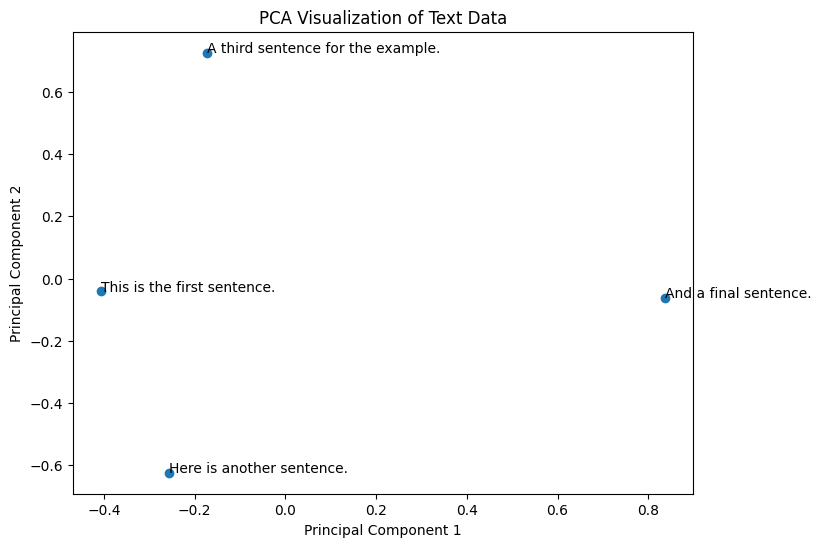

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Sample text data
texts = [
    "This is the first sentence.",
    "Here is another sentence.",
    "A third sentence for the example.",
    "And a final sentence."
]

# Step 1: TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Step 2: PCA
num_components = 2  # You can choose the number of components based on your requirements
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(tfidf_matrix.toarray()) #tfidf_matrix.toarray(): Converts the TF-IDF matrix, which might be a sparse matrix, to a dense NumPy array.

# Print the variance explained by each principal component
print("Variance explained by each principal component:", pca.explained_variance_ratio_)

# Print the transformed data in the reduced-dimensional space
print("PCA Result:")
print(pca_result)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate each point with the corresponding text
for i, txt in enumerate(texts):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))

plt.title('PCA Visualization of Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**LSA (Latent Semantic Analysis)**
Using the LSA to compare similarity of two paragraphs

In [4]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Sample text data for LSA comparison
text_lsa = "This is a new text paragraph for comparison."


# Step 3: TF-IDF vectorization for LSA
vectorizer_lsa = TfidfVectorizer()
tfidf_matrix_lsa = vectorizer_lsa.fit_transform([text_lsa] + texts)

# Step 4: LSA (Truncated SVD)
num_components_lsa = 2
lsa = TruncatedSVD(n_components=num_components_lsa)
lsa_result = lsa.fit_transform(tfidf_matrix_lsa)

# Step 5: Calculate cosine similarity
similarity_score = cosine_similarity([lsa_result[0]], lsa_result[1:])[0]

# Print the similarity score
print("Cosine Similarity Score:", similarity_score)


Cosine Similarity Score: [ 0.78593495  0.34955387  0.74069149 -0.38911152]
